# Hierarchical Clustering


## 1. Create a dendrogram to find the optimal number of clusters
- once for the rudamentary features and once with the additional ones


In [9]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import hierarchicalClustering_functions as hcf
import pandas as pd
import numpy as np
import df_manipulation_functions as dfmf

#from pickle file

basic_features = pd.read_pickle('Temp_Features/basic_features_temp.pkl')
additional_features = pd.read_pickle('Temp_Features/additional_features_temp.pkl')
all_features = pd.read_pickle('Temp_Features/all_features_temp.pkl')



basic_features_normalized = dfmf.normalize_data(basic_features)
additional_features_normalized = dfmf.normalize_data(additional_features)
all_features_normalized = dfmf.normalize_data(all_features)



lower_bound = 2
num_clusters = 70

#create df with Stationsnummer as column and fill it with statinsnummer from all_features_all
cluster_labels_hierachical_basic = all_features['Stationsnummer'].copy()


cluster_labels_hierachical_basic.head()
cluster_labels_hierachical_basic, cluster_scores_hierachical_basic = hcf.hierarchical_clustering(all_features, basic_features_normalized, lower_bound, num_clusters)
cluster_labels_hierachical_additional, cluster_scores_hierachical_additional = hcf.hierarchical_clustering(all_features, additional_features_normalized, lower_bound, num_clusters)
cluster_labels_hierachical_all, cluster_scores_hierachical_all = hcf.hierarchical_clustering(all_features, all_features_normalized, lower_bound, num_clusters)

#save the cluster labels to a csv file in the current directory
cluster_labels_hierachical_basic.to_csv('Labels/Hierarchical/cluster_labels_hierarchical_basic_temp.csv')
#save the cluster scores to a csv file
cluster_scores_hierachical_basic.to_csv('Scores/Hierarchical/cluster_scores_hierarchical_basic_temp.csv')

#save the cluster labels to a csv file in the current directory
cluster_labels_hierachical_additional.to_csv('Labels/Hierarchical/cluster_labels_hierarchical_additional_temp.csv')
#save the cluster scores to a csv file
cluster_scores_hierachical_additional.to_csv('Scores/Hierarchical/cluster_scores_hierarchical_additional_temp.csv')



#save the cluster labels to a csv file
cluster_labels_hierachical_all.to_csv('Labels/Hierarchical/cluster_labels_hierarchical_additional_temp.csv')
#save the cluster scores to a csv file
cluster_scores_hierachical_all.to_csv('Scores/Hierarchical/cluster_scores_hierarchical_all_temp.csv')



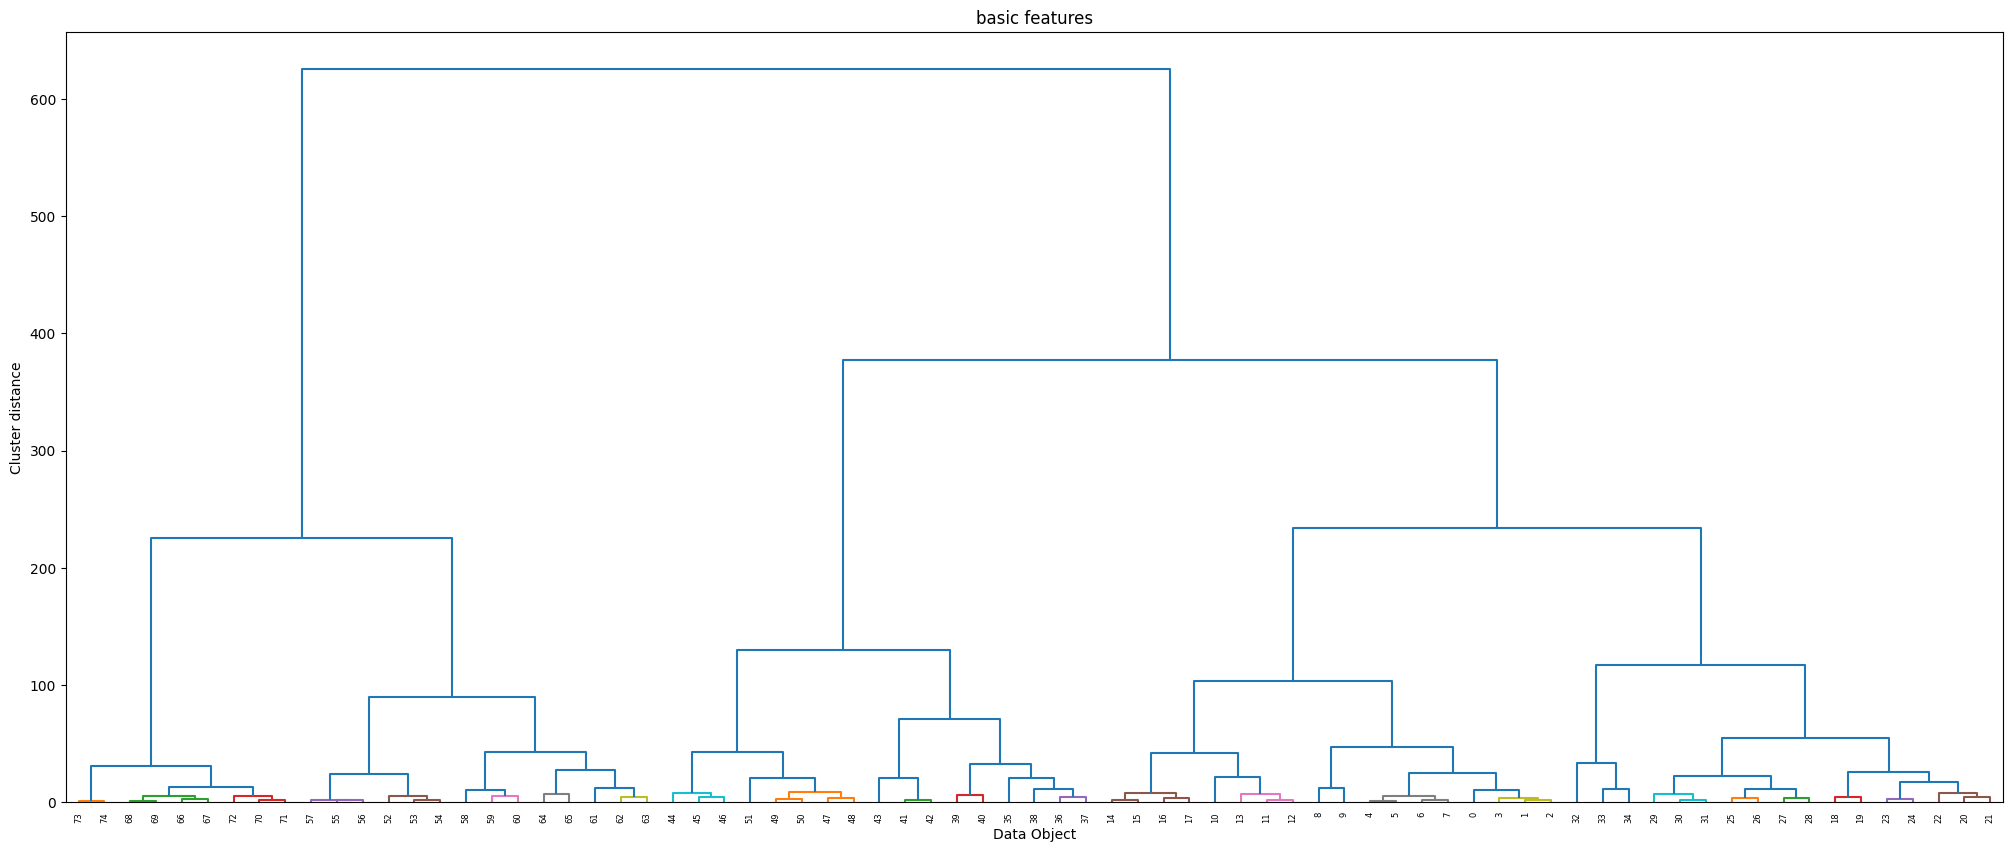

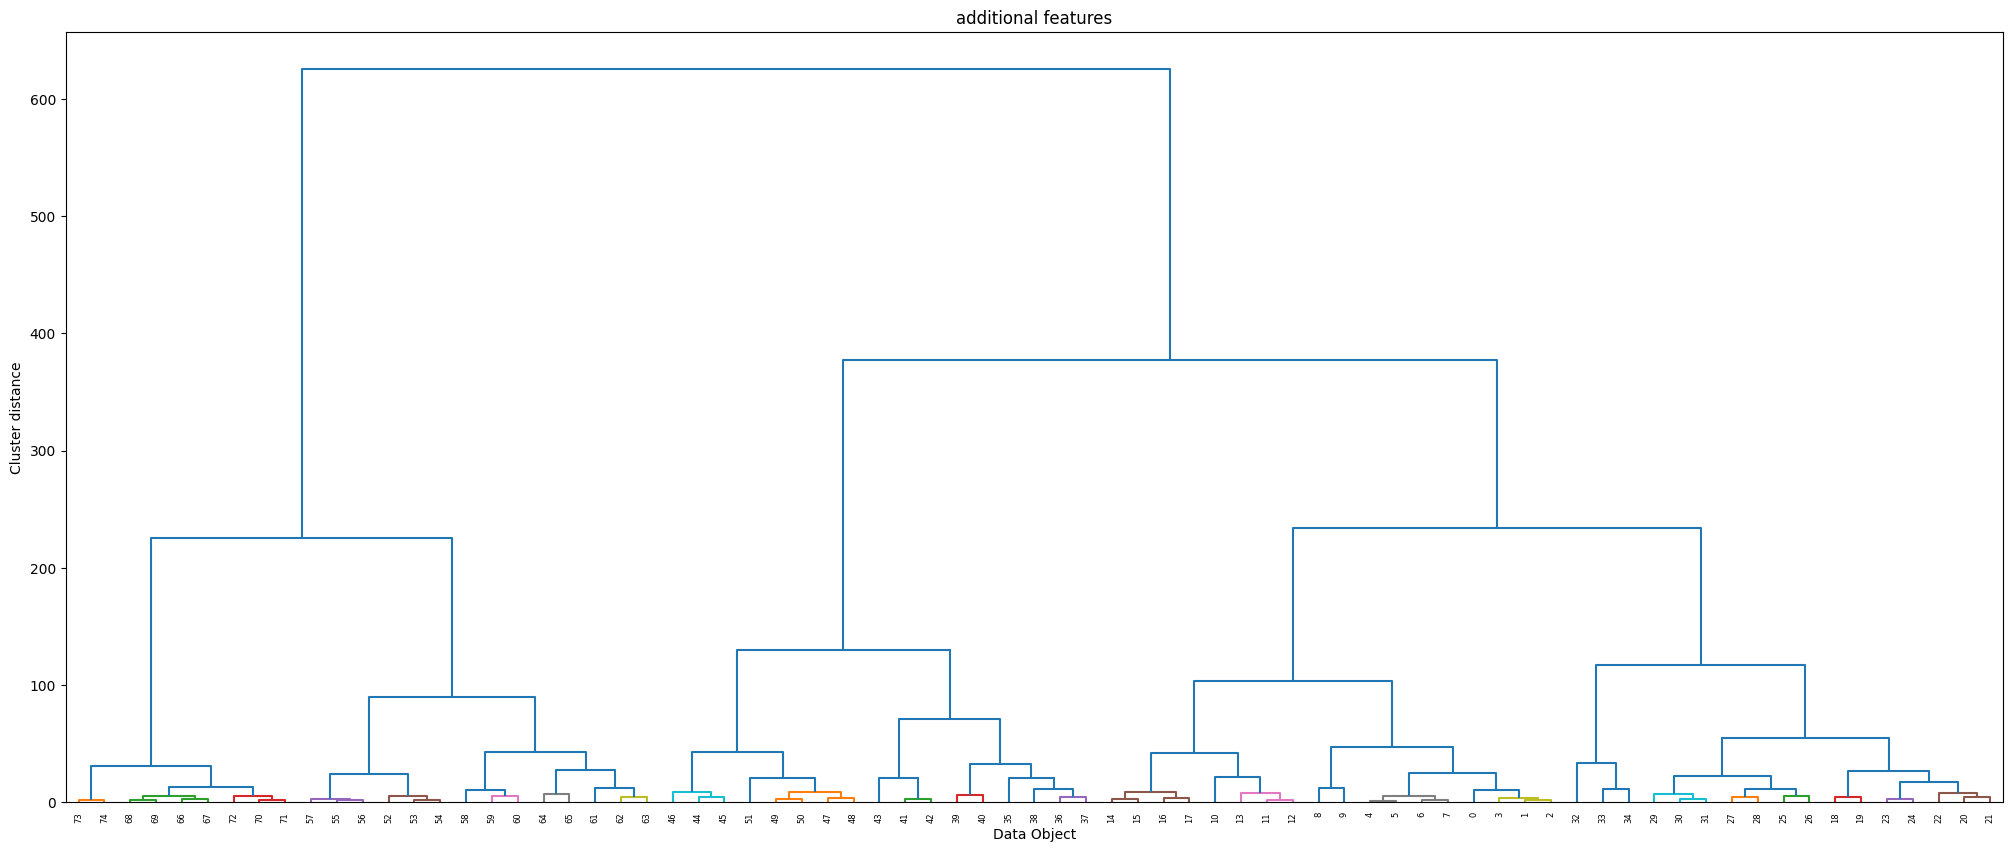

In [10]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import single, complete

#create two dendrograms one for the basic features and one for the additional features

linkage_array = complete(basic_features_normalized)
plt.figure(figsize=(25, 10))
dendrogram(linkage_array, color_threshold=10.0)
plt.title("basic features")
plt.xlabel("Data Object")
plt.ylabel("Cluster distance")
plt.show()

linkage_array = complete(all_features_normalized)
plt.figure(figsize=(25, 10))
dendrogram(linkage_array, color_threshold=10.0)
plt.title("additional features")
plt.xlabel("Data Object")
plt.ylabel("Cluster distance")
plt.show()

## Result:

- one can clearly see that between the rudimentary features and the additional ones there is a not a real difference in the clustering


2. Plot the clusters on mds plots 
- once for the rudamentary features and once with the additional ones


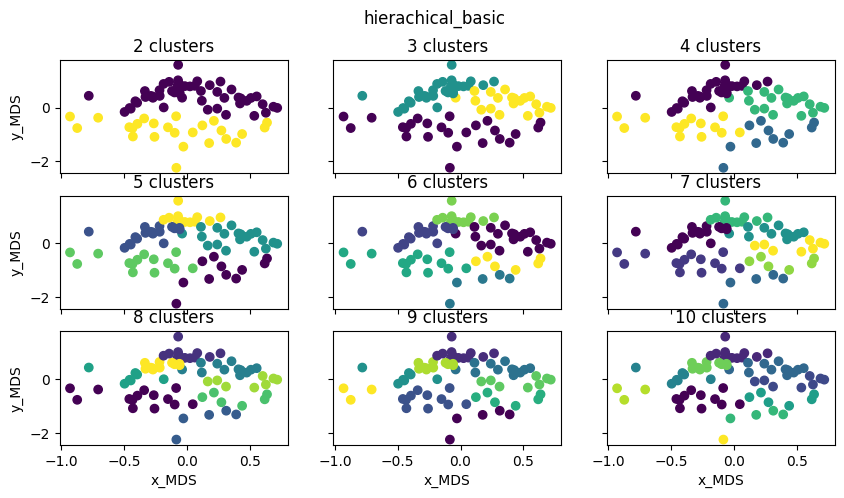

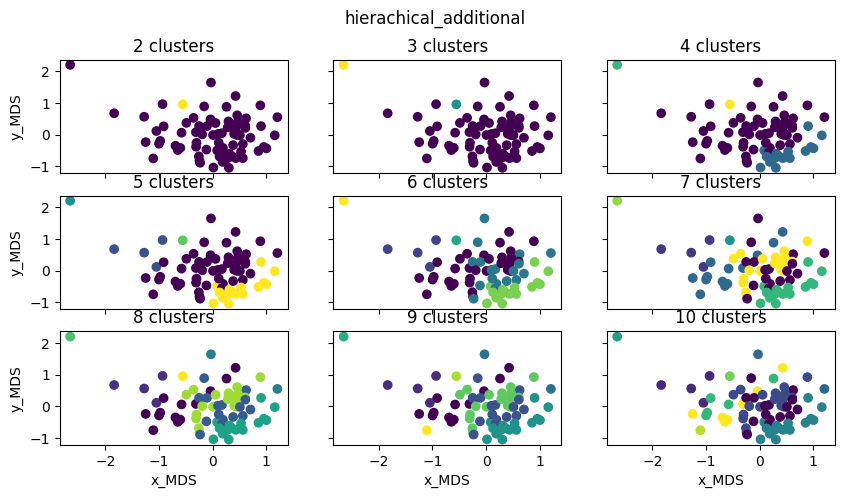

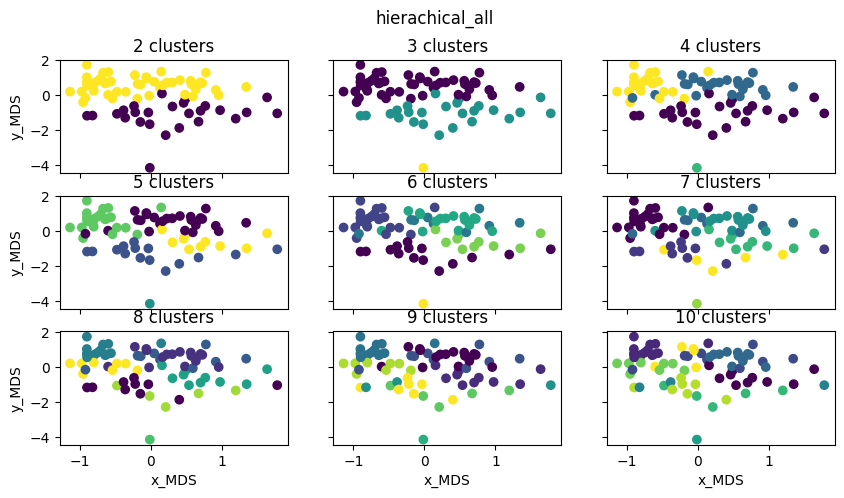

In [11]:
import math as math


all_mds = pd.read_pickle('Temp_mds/all_features_mds_temp.pkl')
additional_mds = pd.read_pickle('Temp_mds/additional_features_mds_temp.pkl')
basic_mds_all_df = pd.read_pickle('Temp_mds/basic_features_mds_temp.pkl')
def plot_clusters(number_of_plots, num_columns, lower_bound, mds_representation, cluster_labels, name):
    # plot the clusters
    num_rows = math.ceil(number_of_plots/num_columns) 
    j = 0
    i = 0

    current_cluster = lower_bound
   


    fig, axs = plt.subplots(num_rows, num_columns)
    fig.set_size_inches(10, 5)
    fig.suptitle(name)
    while current_cluster < number_of_plots + lower_bound:
        axs[j,i].scatter(mds_representation['x_MDS'] , mds_representation['y_MDS'], c=cluster_labels[str(current_cluster) + ' clusters'])
        axs[j,i].set_title(str(current_cluster) + ' clusters')
        #set the height of the subplots to be the same as the width
        #axs[j,i].set_aspect('equal')
        i = i+1
        if(i % 3 ==0):
            j = j+1
            i = 0
        current_cluster = current_cluster + 1

    for ax in axs.flat:
        ax.set(xlabel='x_MDS', ylabel='y_MDS')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()


plot_clusters(9,3,2, basic_mds_all_df, cluster_labels_hierachical_basic,  'hierachical_basic')
plot_clusters(9,3,2, additional_mds, cluster_labels_hierachical_additional, 'hierachical_additional')
plot_clusters(9,3,2, all_mds, cluster_labels_hierachical_all, 'hierachical_all')


## 3. Evaluate the calculated metrics
- once for the rudamentary features and once with the additional ones

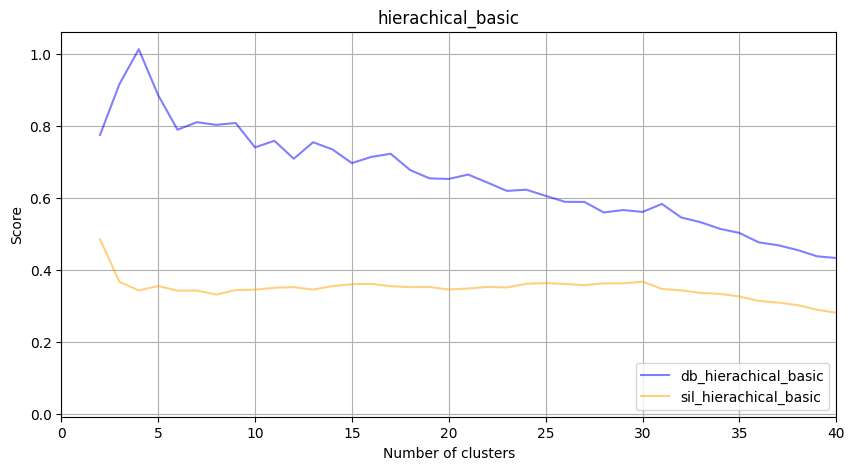

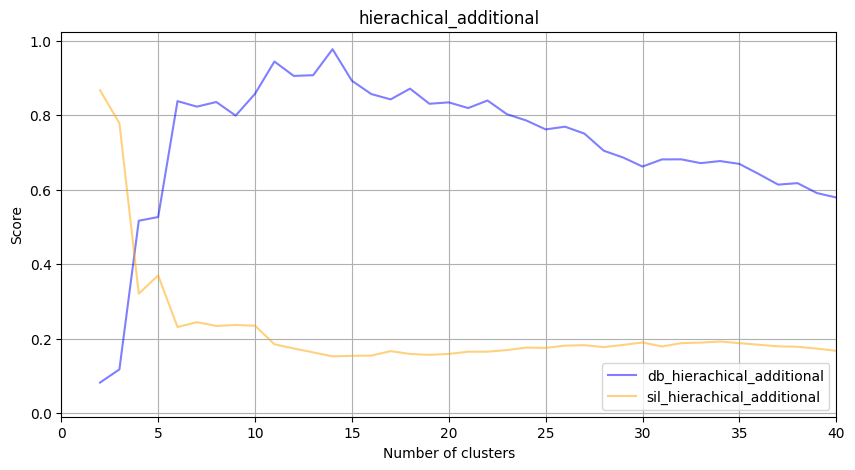

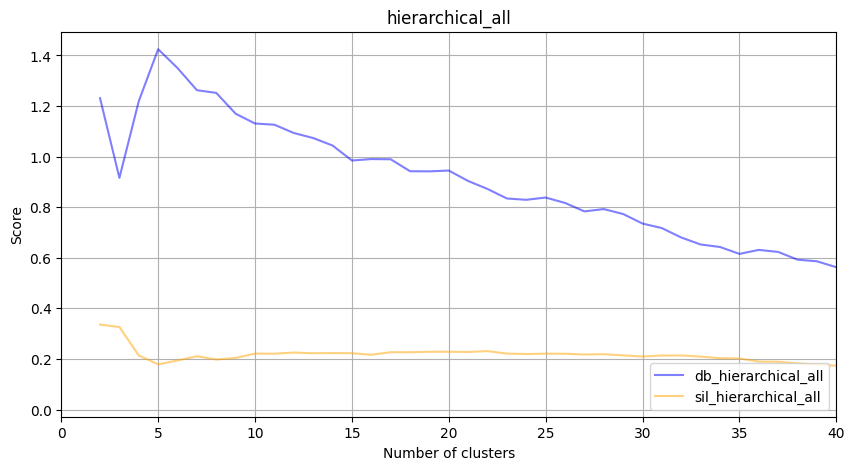

In [12]:
from matplotlib import ticker


def plot_scores(cluster_scores, cluster_option):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(cluster_scores['num_clusters'], cluster_scores['davies_bouldin_score'], label='db_' + cluster_option, color='blue')
    ax.plot(cluster_scores['num_clusters'], cluster_scores['silhouette_score'], label='sil_' +  cluster_option, color='orange')
    #ax.plot(cluster_scores['num_clusters'], -cluster_scores['davies_bouldin_score']+ 1 + cluster_scores['silhouette_score'], label='gesamt_' + cluster_option, color='green')
    ax.grid(True, which='both')
    #reduce x axis to0 to 20
    ax.set_xlim(0,40)

    #only show points not lines
    
      
    ax.set_title(cluster_option)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Score')
    #make graphs semi transparent
    for line in ax.get_lines():
        line.set_alpha(0.5)

    #show the legend in the lower right corner
    ax.legend(loc = 'lower right')
    plt.show()



plot_scores(cluster_scores_hierachical_basic, 'hierachical_basic')
plot_scores(cluster_scores_hierachical_additional, 'hierachical_additional')
plot_scores(cluster_scores_hierachical_all,'hierarchical_all')

# Evaluate maximum silhouette score and minimum davies bouldin score


In [13]:
#reload dfmf
import importlib
importlib.reload(dfmf)



#create a dataframe 
db_min_scores_num_clust = pd.DataFrame(columns=['data', 'extent', 'clustering_option','score_option','score', 'num_clust'])
min_score, num_clust = dfmf.get_min_and_num_clust(cluster_scores_hierachical_basic)
print(min_score)
to_add = pd.DataFrame({'data':['temp'], 'extent':['basic'], 'clustering_option':['hierarchical'],'score_option':['db'],'score':[min_score], 'num_clust':[num_clust]})
db_min_scores_num_clust = db_min_scores_num_clust.append(to_add, ignore_index=True)

min_score, num_clust = dfmf.get_min_and_num_clust(cluster_scores_hierachical_additional)
to_add = pd.DataFrame({'data':['temp'], 'extent':['additional'], 'clustering_option':['hierarchical'],'score_option':['db'],'score':[min_score], 'num_clust':[num_clust]})
db_min_scores_num_clust = db_min_scores_num_clust.append(to_add, ignore_index=True)

min_score, num_clust = dfmf.get_min_and_num_clust(cluster_scores_hierachical_all)
to_add = pd.DataFrame({'data':['temp'], 'extent':['all'], 'clustering_option':['hierarchical'],'score_option':['db'],'score':[min_score], 'num_clust':[num_clust]})
db_min_scores_num_clust = db_min_scores_num_clust.append(to_add, ignore_index=True)
db_min_scores_num_clust.head()



#db_min_scores_num_clust.head()

0.653351805150981


C:\Users\janzu\AppData\Local\Temp\ipykernel_7556\242451922.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db_min_scores_num_clust = db_min_scores_num_clust.append(to_add, ignore_index=True)
C:\Users\janzu\AppData\Local\Temp\ipykernel_7556\242451922.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db_min_scores_num_clust = db_min_scores_num_clust.append(to_add, ignore_index=True)
C:\Users\janzu\AppData\Local\Temp\ipykernel_7556\242451922.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db_min_scores_num_clust = db_min_scores_num_clust.append(to_add, ignore_index=True)


,data,extent,clustering_option,score_option,score,num_clust
0,temp,basic,hierarchical,db,0.653352,20.0
1,temp,additional,hierarchical,db,0.517030,4.0
2,temp,all,hierarchical,db,0.941641,19.0


In [14]:
sil_max_scores_num_clust = pd.DataFrame(columns=['data', 'extent', 'clustering_option','score_option','score', 'num_clust'])
min_score, num_clust = dfmf.get_max_and_num_clust(cluster_scores_hierachical_basic)
print(min_score)
to_add = pd.DataFrame({'data':['temp'], 'extent':['basic'], 'clustering_option':['hierarchical'],'score_option':['sil'],'score':[min_score], 'num_clust':[num_clust]})
sil_max_scores_num_clust = sil_max_scores_num_clust.append(to_add, ignore_index=True)

min_score, num_clust = dfmf.get_max_and_num_clust(cluster_scores_hierachical_additional)
to_add = pd.DataFrame({'data':['temp'], 'extent':['additional'], 'clustering_option':['hierarchical'],'score_option':['sil'],'score':[min_score], 'num_clust':[num_clust]})
sil_max_scores_num_clust = sil_max_scores_num_clust.append(to_add, ignore_index=True)

min_score, num_clust = dfmf.get_max_and_num_clust(cluster_scores_hierachical_all)
to_add = pd.DataFrame({'data':['temp'], 'extent':['all'], 'clustering_option':['hierarchical'],'score_option':['sil'],'score':[min_score], 'num_clust':[num_clust]})
sil_max_scores_num_clust = sil_max_scores_num_clust.append(to_add, ignore_index=True)
sil_max_scores_num_clust.head()

0.3613097051334756


C:\Users\janzu\AppData\Local\Temp\ipykernel_7556\585703170.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sil_max_scores_num_clust = sil_max_scores_num_clust.append(to_add, ignore_index=True)
C:\Users\janzu\AppData\Local\Temp\ipykernel_7556\585703170.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sil_max_scores_num_clust = sil_max_scores_num_clust.append(to_add, ignore_index=True)
C:\Users\janzu\AppData\Local\Temp\ipykernel_7556\585703170.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sil_max_scores_num_clust = sil_max_scores_num_clust.append(to_add, ignore_index=True)


,data,extent,clustering_option,score_option,score,num_clust
0,temp,basic,hierarchical,sil,0.361310,16.0
1,temp,additional,hierarchical,sil,0.370265,5.0
2,temp,all,hierarchical,sil,0.228464,20.0


In [15]:
#add df together
scores = pd.concat([sil_max_scores_num_clust, db_min_scores_num_clust])
scores = scores.reset_index(drop=True)
scores.head(6)

,data,extent,clustering_option,score_option,score,num_clust
0,temp,basic,hierarchical,sil,0.361310,16.0
1,temp,additional,hierarchical,sil,0.370265,5.0
2,temp,all,hierarchical,sil,0.228464,20.0
3,temp,basic,hierarchical,db,0.653352,20.0
4,temp,additional,hierarchical,db,0.517030,4.0
5,temp,all,hierarchical,db,0.941641,19.0


## Result:
- one can clearly see that between the rudimentary features and the additional ones there is no difference in the scores
- at 9 clusters a first local maxima is reached and after that the clustering does not get very much better


## 3. Show clusters on the map


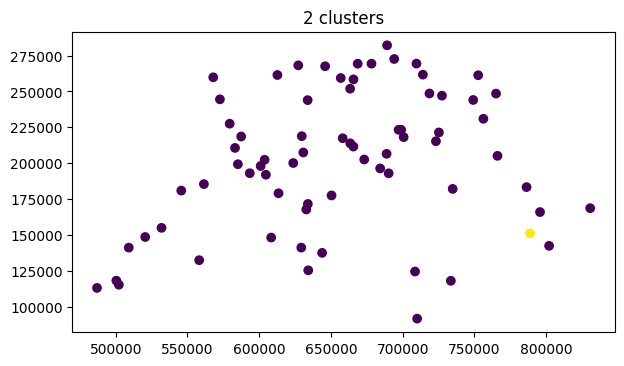

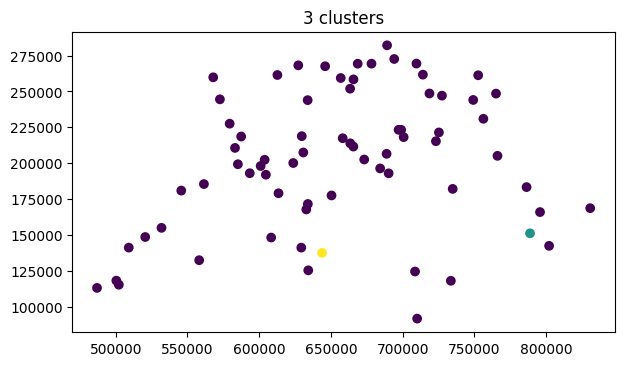

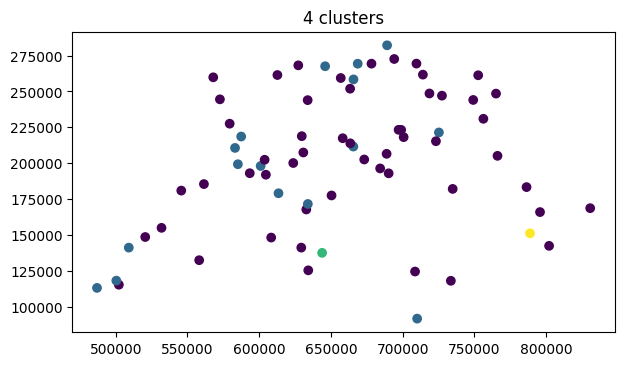

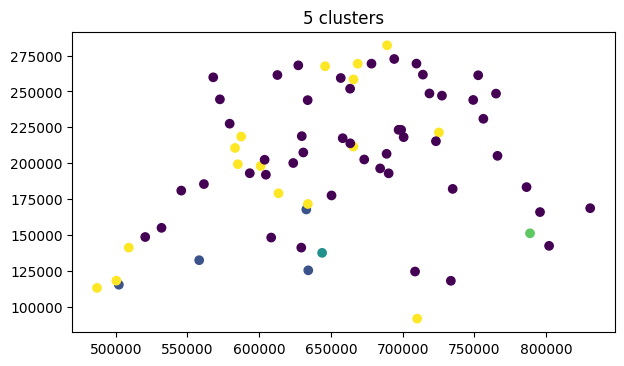

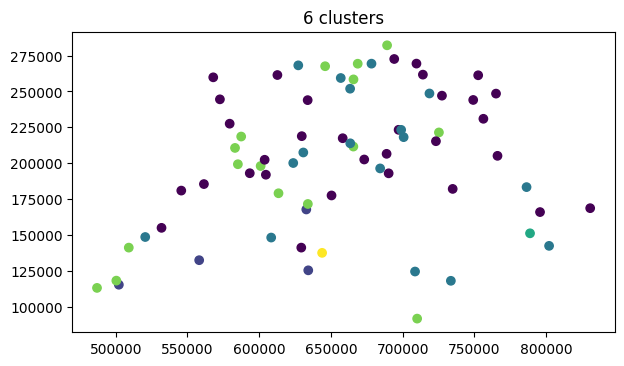

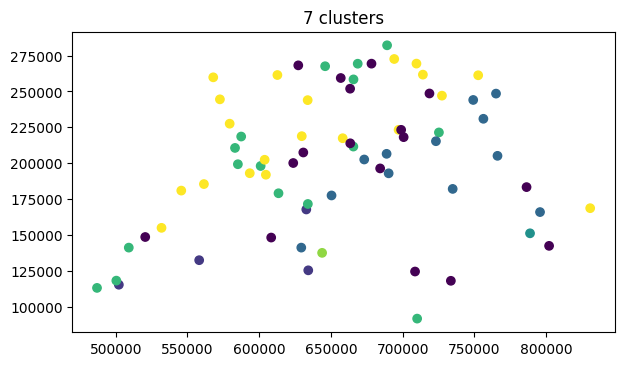

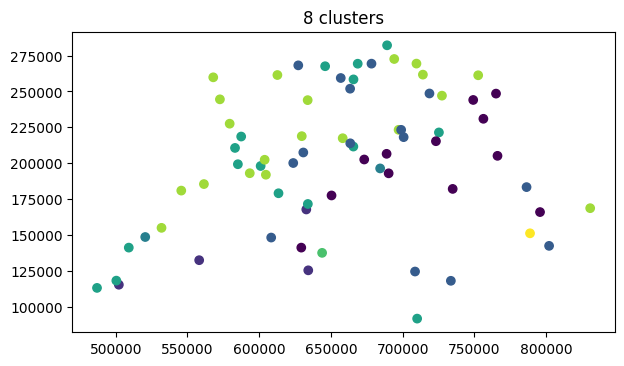

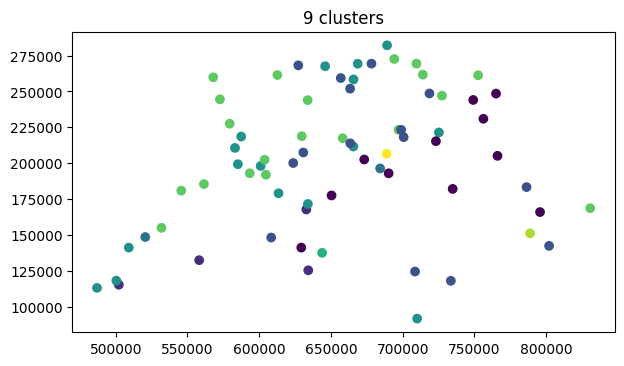

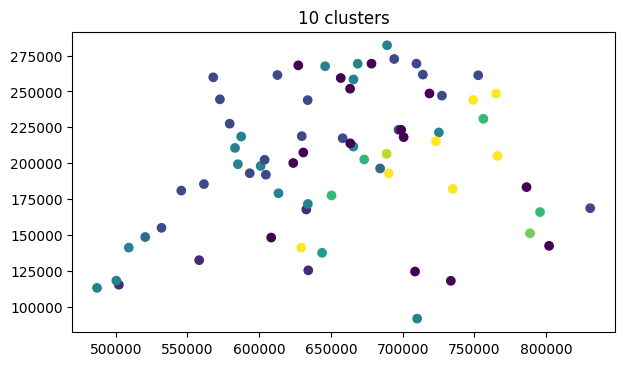

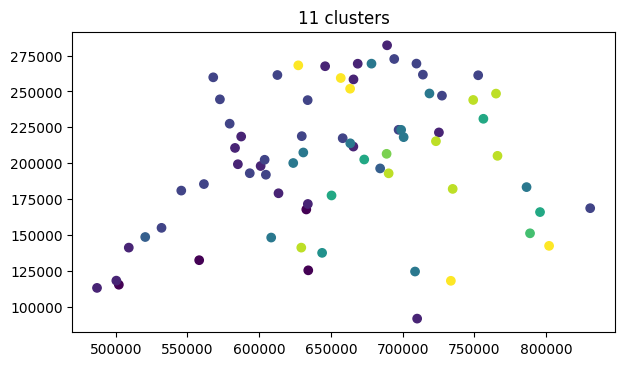

In [16]:
# show clusters on map 
#read in the data
locations_df = pd.read_csv("Data/stations_location.csv", sep=",")

#merge cluster labels with locations_df on Stationsnummer= Station_Nr
def merge_clusterlabels_map(cluster_labels):
    cluster_labels = pd.merge(cluster_labels, locations_df, left_on='Stationsnummer', right_on='Station_Nr')
    return cluster_labels
#plot the clusters with the locations of the stations

def plot_clusters_map( cluster_labels, num_clusters):

    fig, ax = plt.subplots(figsize=(7,5))
    ax.scatter(cluster_labels['From_Node_X'] , cluster_labels['From_Node_Y'], c=cluster_labels[num_clusters + ' clusters'])
    ax.set_title(num_clusters +' clusters')
    ax.set_aspect('equal')
    #print name of each station to the point
    # for i, txt in enumerate(cluster_labels_kmeans_map['Station_Name']):
    #     ax.annotate(txt, (cluster_labels_kmeans_map['From_Node_X'][i], cluster_labels_kmeans_map['From_Node_Y'][i]))
    plt.show()

for i in range(2,12):
    plot_clusters_map(merge_clusterlabels_map(cluster_labels_hierachical_additional), str(i))


